## import libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# read updated csv file
df = pd.read_csv('./CleanedDataSet.csv')
df = df.drop(['Unnamed: 0'], axis=1) # removed unnamed column
df.columns

Index(['Player', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'High_Score', 'Avg',
       'Ball_Faced', 'Strike_Rate', '100', '50', '0', '4s', '6s', 'Debut_Year',
       'Final_Year', 'Country', 'Career_Length'],
      dtype='object')

## Who has the highest batting average in Test cricket history?

In [120]:
# Sort DataFrame by 'Avg' in descending order
top_batsmen = df.sort_values(by="Avg", ascending=False).head(10)
top_batsmen.head(2)

,Player,Matches,Inns,Not_Outs,Runs,High_Score,Avg,Ball_Faced,Strike_Rate,100,50,0,4s,6s,Debut_Year,Final_Year,Country,Career_Length
0,DG Bradman,52,80,10,6996,334,99.942857,9800+,58.60,29,13,7,626,6,1928,1948,AUS,20
1,AC Voges,20,31,7,1485,269,61.870000,2667,55.68,5,4,2,186,5,2015,2016,AUS,1


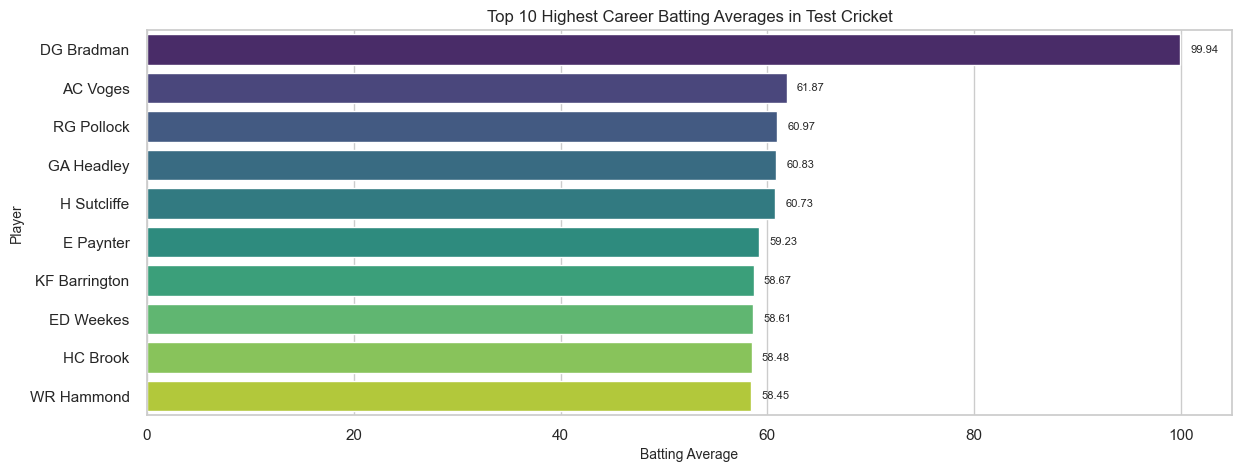

In [184]:
# Set figure size
plt.figure(figsize=(14, 5))

# Bar plot using Seaborn
sns.barplot(
    x="Avg", 
    y="Player", 
    data=top_batsmen, 
    palette="viridis",
    hue="Player",
)

# Title and Labels
plt.title("Top 10 Highest Career Batting Averages in Test Cricket", fontsize=12)
plt.xlabel("Batting Average", fontsize=10)
plt.ylabel("Player", fontsize=10)

# Show exact values on bars
for index, value in enumerate(top_batsmen["Avg"]):
    plt.text(value + 1, index, f"{value:.2f}", va="center", fontsize=8)

plt.show()

# 1. Performance-Based Questions

## How does the batting average correlate with the number of matches played?

In [122]:
# Calculate correlation coefficient
correlation = df["Matches"].corr(df["Avg"])
print(f"Correlation Coefficient: {correlation:.3f}")

## Correlation is negative, which means average tends to decline as player plays more matches.
### Example: Sachin Tendulkar (avg = 52, matches = 200) and DG Bradman (avg = 99, matches = 52)

## But, correlation is close to 0(zero), which means relation is weak, which further means 
## player may or may not experience low avg with more number of matches

Correlation Coefficient: -0.146


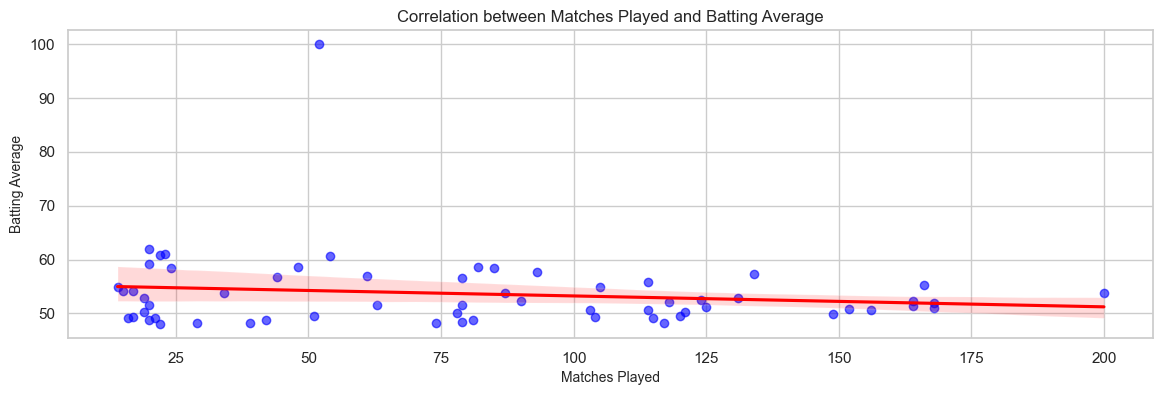

In [183]:
# Set plot style for better visuals
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(14, 4))
sns.regplot(
    x="Matches", 
    y="Avg", 
    data=df, 
    scatter_kws={"color": "blue", "alpha": 0.6}, 
    line_kws={"color": "red"}
)
plt.title("Correlation between Matches Played and Batting Average", fontsize=12)
plt.xlabel("Matches Played", fontsize=10)
plt.ylabel("Batting Average", fontsize=10)
plt.show()

In [124]:
## Lets split data into different groups (e.g., players with <50 Tests vs. 50+ Tests) to check if correlation changes?

In [125]:
# Splitting the data
short_career = df[df["Matches"] < 50]
long_career = df[df["Matches"] >= 50]
long_career = long_career[long_career["Player"]!="DG Bradman "]
print(short_career.shape)
print(long_career.shape)

(22, 18)
(38, 18)


In [126]:
# Calculate correlation separately
corr_short = short_career["Matches"].corr(short_career["Avg"])
corr_long = long_career["Matches"].corr(long_career["Avg"])
print(f"Short Correlation Coefficient: {corr_short:.3f}, \nLong Correlation Coefficient: {corr_long:.3f}")

Short Correlation Coefficient: 0.028, 
Long Correlation Coefficient: -0.150


In [127]:
## Short term players relation is almost zero mean there there avg doest matter with number of matches they played.
## Long term players relation is still weak negative they might notice decline in avg.

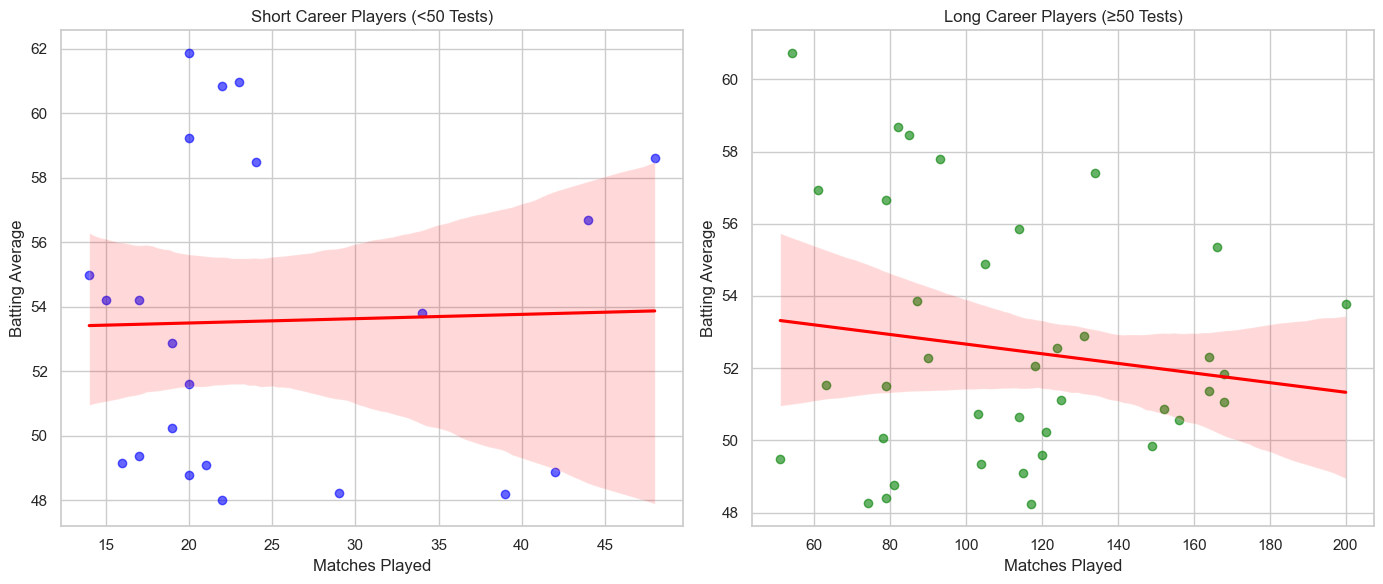

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Short Career Players
sns.regplot(
    x="Matches", y="Avg", data=short_career, 
    scatter_kws={"color": "blue", "alpha": 0.6}, 
    line_kws={"color": "red"}, ax=axes[0]
)
axes[0].set_title("Short Career Players (<50 Tests)")
axes[0].set_xlabel("Matches Played")
axes[0].set_ylabel("Batting Average")

# Long Career Players
sns.regplot(
    x="Matches", y="Avg", data=long_career, 
    scatter_kws={"color": "green", "alpha": 0.6}, 
    line_kws={"color": "red"}, ax=axes[1]
)
axes[1].set_title("Long Career Players (≥50 Tests)")
axes[1].set_xlabel("Matches Played")
axes[1].set_ylabel("Batting Average")
plt.tight_layout()
plt.show()

## What is the average number of centuries (100s) scored by players with a batting average above 50?

In [129]:
players_above_50_avg = df[df['Avg'] > 50]
players_above_50_avg.shape

(44, 18)

In [130]:
average_centuries = players_above_50_avg['100'].mean()
total_players_above_50 = len(players_above_50_avg)
print(f"The total number of players with a batting average >= 50 is: {total_players_above_50}")
print(f"The average number of centuries scored by players with a batting average above 50 is: {average_centuries:.2f}")

The total number of players with a batting average >= 50 is: 44
The average number of centuries scored by players with a batting average above 50 is: 20.82


## What is the distribution of batting averages for players with over 50 matches?

In [131]:
players_above_50_matches = df[df['Matches'] > 50]
players_above_50_matches.shape

(39, 18)

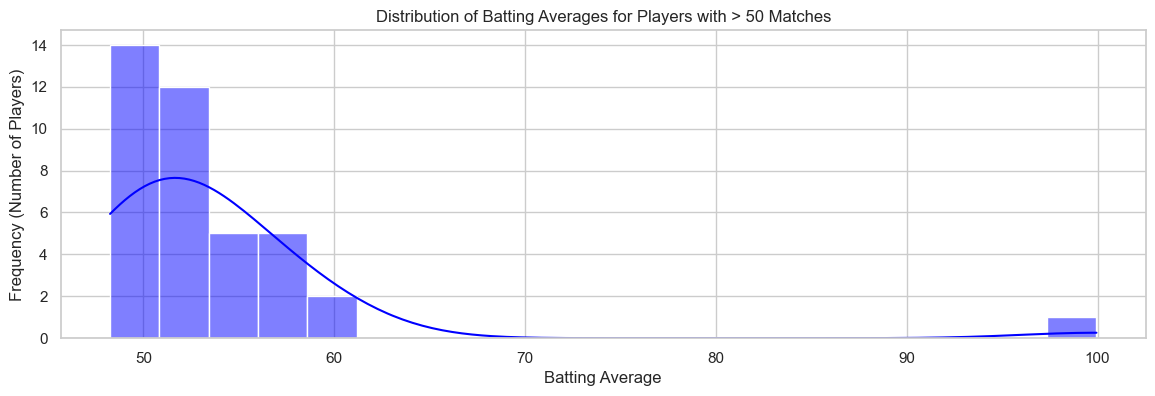

In [182]:
# Plot the distribution of batting averages for players with more than 50 matches
plt.figure(figsize=(14, 4))
sns.histplot(players_above_50_matches['Avg'], kde=True, color='blue', bins=20)
plt.title('Distribution of Batting Averages for Players with > 50 Matches')
plt.xlabel('Batting Average')
plt.ylabel('Frequency (Number of Players)')
plt.show()

## How many players have maintained a batting average above 50 across different eras (pre-1950s, 1950s-2000s, post-2000s)?

In [133]:
pre_1950s = players_above_50_avg[players_above_50_avg['Debut_Year'] < 1950]
post_1950s_2000s = players_above_50_avg[(players_above_50_avg['Debut_Year'] >= 1950) & (players_above_50_avg['Debut_Year'] <= 2000)]
post_2000s = players_above_50_avg[players_above_50_avg['Debut_Year'] > 2000]

# Count the number of players in each era
player_counts = [len(pre_1950s), len(post_1950s_2000s), len(post_2000s)]
print(player_counts)
post_2000s.head()

[13, 22, 9]


,Player,Matches,Inns,Not_Outs,Runs,High_Score,Avg,Ball_Faced,Strike_Rate,100,50,0,4s,6s,Debut_Year,Final_Year,Country,Career_Length
1,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
8,HC Brook,24,40,1,2281,317,58.48,2581,88.37,8,10,2,246,37,2022,2024,ENG,2
15,SPD Smith,114,204,25,9999,239,55.86,18671,53.55,34,41,11,1094,58,2010,2025,AUS,15
18,KS Williamson,105,186,17,9276,251,54.88,17913,51.78,33,37,11,1031,27,2010,2024,NZ,14
25,YBK Jaiswal,19,36,2,1798,214,52.88,2738,65.66,4,10,3,207,39,2023,2025,IND,2


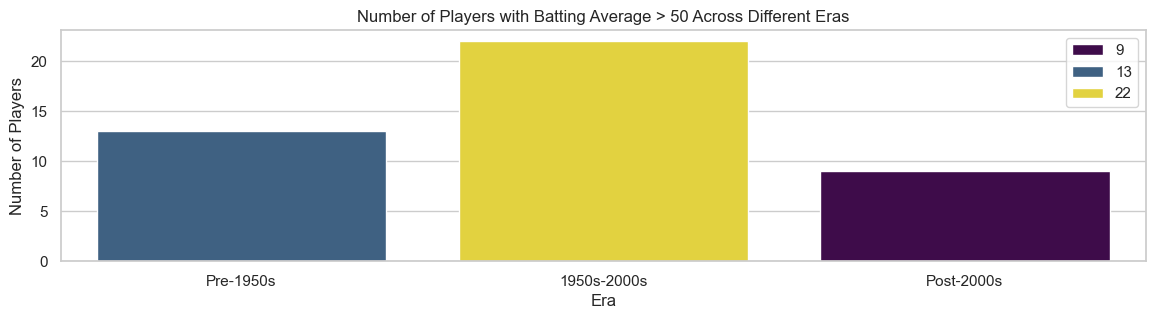

In [157]:
plt.figure(figsize=(14, 3))
sns.barplot(x=['Pre-1950s', '1950s-2000s', 'Post-2000s'], y=player_counts, palette="viridis", hue=player_counts)
plt.title("Number of Players with Batting Average > 50 Across Different Eras")
plt.xlabel("Era")
plt.ylabel("Number of Players")
plt.show()

## Which country has produced the most players with an average above 50?

In [161]:
# players_above_50_avg.shape

In [160]:
country_count = players_above_50_avg['Country'].value_counts()
# country_count

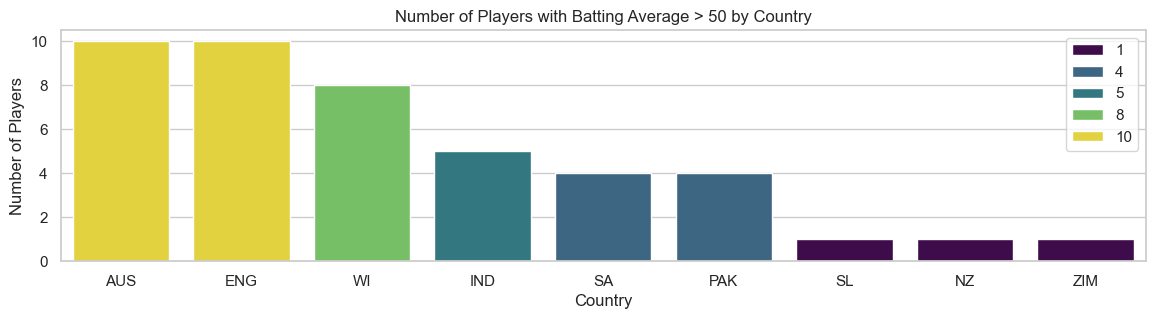

In [155]:
plt.figure(figsize=(14,3))
sns.barplot(x=country_count.index, y=country_count.values, palette="viridis", hue=country_count.values)

plt.title("Number of Players with Batting Average > 50 by Country")
plt.xlabel("Country")
plt.ylabel("Number of Players")
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## What is the average career batting average of players from different countries?

In [158]:
avg_batting_by_country = df.groupby("Country")["Avg"].mean().sort_values(ascending=False)
# avg_batting_by_country

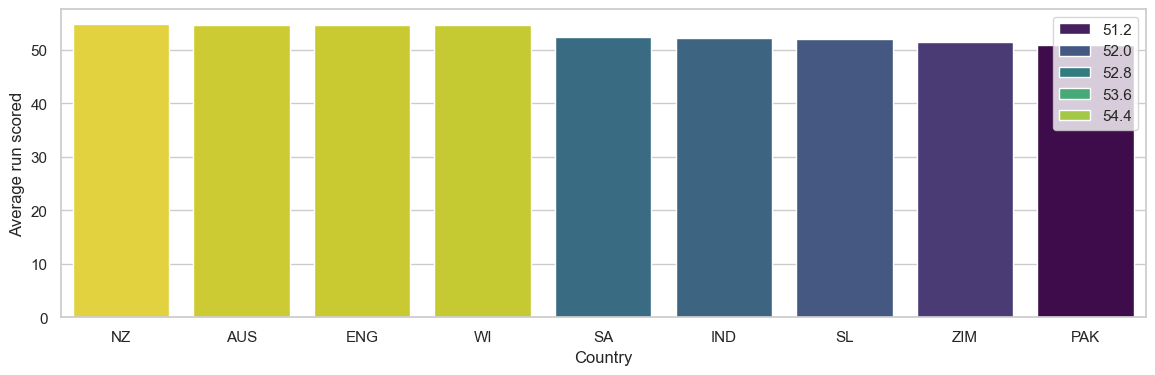

In [159]:
plt.figure(figsize=(14,4))
sns.barplot(x=avg_batting_by_country.index, y=avg_batting_by_country.values, palette='viridis', hue=avg_batting_by_country.values)
plt.title("Average Career Batting Average by Country")
plt.xlabel("Country")
plt.ylabel("Average run scored")
plt.show()

## How does the number of centuries (100s) vary by country?

In [173]:
centuries_by_country = df.groupby("Country")["100"].sum().sort_values(ascending=False)
# centuries_by_country

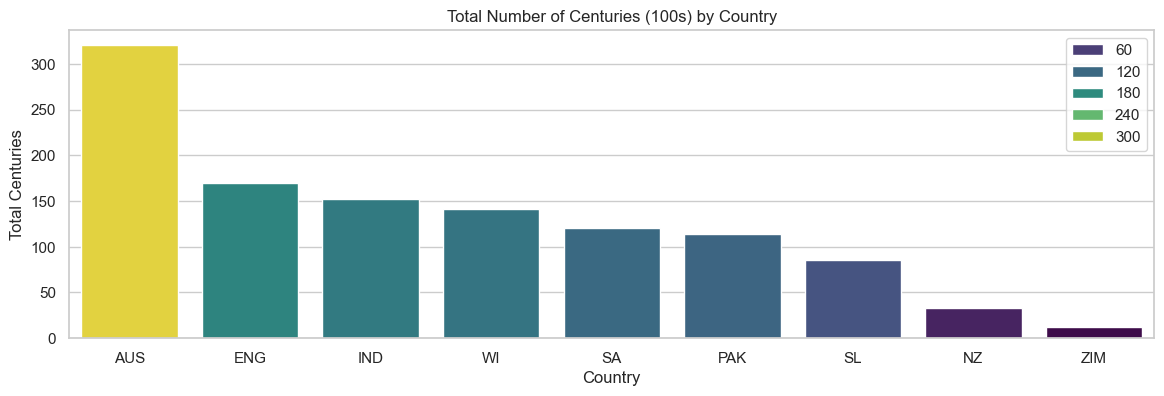

In [172]:
plt.figure(figsize=(14,4))
sns.barplot(x=centuries_by_country.index, y=centuries_by_country.values, palette='viridis', hue=centuries_by_country.values)
plt.title("Total Number of Centuries (100s) by Country")
plt.ylabel("Total Centuries")
plt.show()

## Which country has the highest representation in the top 50 batting averages of all time?

In [180]:
top_50 = df.sort_values(by="Avg", ascending=False).head(50)
top_50_representation = top_50["Country"].value_counts()
# top_50_representation

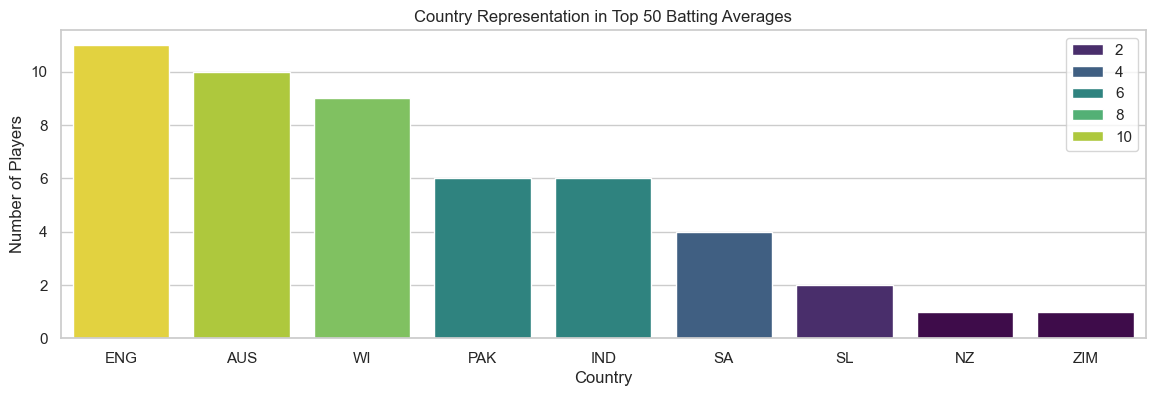

In [179]:
plt.figure(figsize=(14, 4))
sns.barplot(x=top_50_representation.index, y=top_50_representation.values, palette="viridis", hue=top_50_representation.values)
plt.title("Country Representation in Top 50 Batting Averages")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.show()

In [177]:
# tdf = df[df['Country']=='AUS']
# tdf = tdf[tdf['100'] > 20]
# tdf